In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, '/Users/mrahimi/AVM/module/')
import Plot
pl = Plot.Plot()
import sql2pd

# Customer and Client

In [4]:
dcc = pd.read_csv("../CA2/customer_client3.csv")
print(dcc.shape)

(2430368, 9)


In [5]:
index = pd.DatetimeIndex(dcc.CUSTOMER_DATE).year == 2018
sum(index)

556656

In [6]:
index = pd.DatetimeIndex(dcc.CLIENT_DATE).year == 2018
sum(index)

705354

In [7]:
index = pd.DatetimeIndex(dcc.LR_LEAD_CREATE_DATE).year == 2018
sum(index)

693043

In [8]:
index = pd.DatetimeIndex(dcc.LR_LEAD_ACCEPT_DATE).year == 2018
sum(index)

724492

In [9]:
index = pd.DatetimeIndex(dcc.LR_LEAD_CREATE_DATE).year == 2018
dcc = dcc[index]
print(dcc.shape)

(693043, 9)


In [10]:
dcc = dcc[~dcc.duplicated("CUSTOMER_ID")]
print("Number of customer", dcc.shape)

dcc = dcc[~dcc.duplicated("CLIENT_ID", keep=False)]
print(dcc.shape)

Number of customer (547958, 9)
(547958, 9)


In [11]:
dcc.columns = [x.lower() for x in dcc.columns]

In [12]:
dcc["lr_month"] = pd.DatetimeIndex(dcc["lr_lead_create_date"]).month

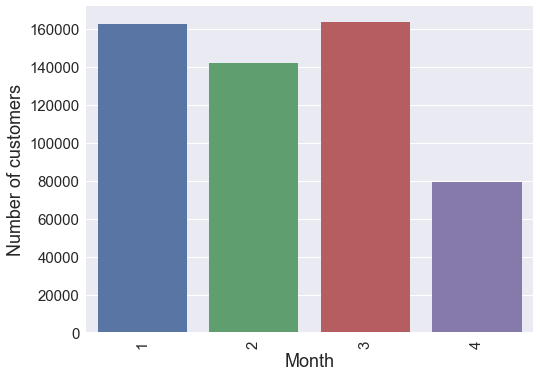

In [13]:
pl.count_bar(dcc.lr_month, xlabel="Month", ylabel="Number of customers")

# log file

In [17]:
# READ LOG TIME
dlog = pd.read_csv("../CA2_2018/login.csv")
print(dlog.shape)

(5367051, 2)


In [18]:
dlog.columns = [x.lower() for x in dlog.columns]
dlog.head()

,time_in,client_id
0,2017-01-01 00:01:23,24731837
1,2017-01-01 00:03:19,15748101
2,2017-01-01 00:07:00,11077476
3,2017-01-01 00:21:33,17598068
4,2017-01-01 00:31:09,7742207


# merge clinet and login

In [19]:
df = pd.merge(dcc, dlog, on = "client_id", how="left")
df.shape

(547958, 11)

In [20]:
df.columns = [x.lower() for x in df.columns]
df.head()

,customer_id,customer_date,client_date,client_id,lr_website_name,metro,lr_lead_accept_date,lr_lead_create_date,application_id,lr_month,time_in
0,14282917,2015-11-30 09:37:40,2015-11-30 09:37:40,18035142,Realtor.com,queens,2018-03-13 16:22:20,2018-03-13 13:01:44,4,3,NaN
1,13923018,2015-07-29 07:23:11,2015-11-30 09:57:26,18038972,Zillow.com,queens,2018-01-22 12:30:01,2018-01-22 09:28:32,8,1,NaN
2,14159758,2015-11-02 15:34:39,2015-11-30 11:11:08,18052318,Realtor.com,queens,2018-04-12 12:57:30,2018-04-11 20:05:04,8,4,NaN
3,14305899,2015-11-30 11:53:26,2015-11-30 11:53:26,18060858,Realtor.com,queens,2018-03-30 14:30:20,2018-03-29 23:42:28,4,3,NaN
4,13907840,2015-07-23 11:18:40,2015-11-30 11:52:35,18060686,Realtor.com,queens,2018-03-25 13:06:28,2018-03-25 09:21:26,7,3,NaN


In [21]:
print("Number of distinct login in 2017:", df.shape[0] - sum(df["time_in"].isnull()))

Number of distinct login in 2017: 45474


In [22]:
print("Transition from customer to Zap lead(%): ", (df.shape[0] - sum(df["time_in"].isnull())) * 100 / df.shape[0])

Transition from customer to Zap lead(%):  8.29881122276


# Home Info

In [24]:
dinfo = pd.read_csv("../CA2_2018/home_info.csv")
print(dinfo.shape)

(2144435, 5)


In [25]:
index = dinfo["POSTAL_CODE"].isnull() | dinfo["LISTING_NUM"].isnull()
dinfo = dinfo[~index]

print(dinfo.shape)

(2057059, 5)


In [26]:
dinfo = dinfo[~dinfo.duplicated(["CLIENT_ID"])]
print(dinfo.shape)

(2054111, 5)


In [27]:
dinfo.columns = [x.lower() for x in dinfo.columns]
dinfo.head()

,client_id,listing_num,postal_code,mls_source,client_notes
0,33716239,1709853,07624,NJ_MLS,I would like to know lot size and living SF. T...
6,33718415,132826,29574,SC_RAGPD,I was wondering if the owners are willing to o...
7,33712239,10069647,72404,AR_JBOR,Help
8,33714651,170030397,91977,SANDICOR,NaN
9,24941595,09641166,60543,MLSNI,What are the taxes per month?


In [28]:
index = dinfo["postal_code"].isnull()
dinfo = dinfo[~index]

dinfo.shape

(2054111, 5)

In [29]:
def clean_zip(dq):
    dic = {}
    for x in dq.unique():
        dic[x] = x.split("-")[0]
        
    dq = dq.map(dic)
    
    code = []
    for x in dq.values:
        try:
            code.append(int(x))
        except:
            x = x.replace("`","")
            x = x.replace(",","")
            try:
                code.append(int(x.split(" ")[0]))
            except:
                code.append("NULL")
    
    return code

dinfo["postal_code"] = clean_zip(dinfo["postal_code"])

In [30]:
index = dinfo.postal_code == "NULL"
dinfo = dinfo[~index]
dinfo.shape

(2053821, 5)

In [31]:
dinfo["postal_code"] = dinfo["postal_code"].astype(int)

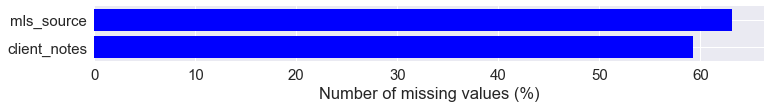

In [32]:
pl.missing(dinfo)

# Postal code

In [33]:
dpost = pd.read_csv("../home_info/post.csv")
print(dpost.shape)

(36023, 2)


In [34]:
dpost.columns = [x.lower() for x in dpost.columns]
dpost.head()

,mls_table,postal_code
0,mls_listing,87109
1,mls_listing,87199
2,mls_listing,87101
3,mls_listing,87103
4,mls_listing,87125


In [35]:
dinfo = pd.merge(dinfo, dpost, on="postal_code", how="left")
dinfo.shape

(2053821, 6)

In [36]:
index = dinfo["mls_table"].isnull()
dinfo = dinfo[~index]
dinfo.shape

(2047679, 6)

In [37]:
dinfo.head()

,client_id,listing_num,postal_code,mls_source,client_notes,mls_table
0,33716239,1709853,7624,NJ_MLS,I would like to know lot size and living SF. T...,mls_baltimore
1,33718415,132826,29574,SC_RAGPD,I was wondering if the owners are willing to o...,mls_listing
2,33712239,10069647,72404,AR_JBOR,Help,mls_listing
3,33714651,170030397,91977,SANDICOR,NaN,mls_so_cal
4,24941595,09641166,60543,MLSNI,What are the taxes per month?,mls_chicago


# Join home_info and client

In [38]:
df = pd.merge(df, dinfo[["client_id", "listing_num", "postal_code", "mls_source", "mls_table"]], on = "client_id", how="left")
df.shape

(547958, 15)

In [39]:
index = df.listing_num.isnull()
sum(index)

68265

In [40]:
sum(df["postal_code"].isnull())

68265

In [41]:
# ration of missing postalcode to all data
print(sum(df["postal_code"].isnull()) / df.shape[0])

0.12458071604


In [42]:
index = df["postal_code"].isnull()
df = df[~index]

df.shape

(479693, 15)

In [43]:
print("Number of distinct login in 2017:", df.shape[0] - sum(df["time_in"].isnull()))
print("Transition from customer to Zap lead(%): ", (df.shape[0] - sum(df["time_in"].isnull())) * 100 / df.shape[0])

Number of distinct login in 2017: 33931
Transition from customer to Zap lead(%):  7.07348241479


In [44]:
for table in df.mls_table.unique():
    print(table, df[df.mls_table == table].shape[0])

mls_newyork 41049
mls_so_cal 37388
mls_baltimore 101351
mls_chicago 41463
mls_listing 58732
mls_dallas 45566
mls_atlanta 15811
mls_boston 58208
mls_phoenix 14128
mls_orlando 41814
mls_ca_ba 11269
mls_seattle 3258
mls_raleigh 7271
mls_denver 2385


# MLS DATA

In [46]:
d1 = pd.read_csv("listing_active.csv")
d2 = pd.read_csv("listing_inactive.csv")

dmls = pd.concat([d1, d2], axis=0)
print(dmls.shape)

/Users/mrahimi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9662094, 14)


In [47]:
d1.head()

,LISTING_NUM,SOURCE,LISTING_PRICE,LISTING_DATE,HOME_SQ_FEET,ZIP,PROPERTY_TYPE,BEDROOMS,FULL_BATHS,YEAR_BUILT,STATE,CITY,LATITUDE,LONGITUDE
0,2048479,SOLO,285000,NaN,NaN,71119.0,SFR,4,2,2001.0,LA,Shreveport,32.489182,-93.833221
1,310594,MT_BZM,489000,2017-11-07,NaN,59729.0,LAND,0,0,NaN,MT,Ennis,NaN,NaN
2,2024597,SOLO,39000,NaN,NaN,38555.0,LAND,0,0,NaN,TN,Crossville,36.029631,-84.678336
3,217081298,MI_REALCOMP,289000,2017-10-02,1320.0,48137.0,SFR,2,2,1989.0,MI,Unadilla,42.434261,-84.058182
4,310595,MT_BZM,603000,2017-11-07,NaN,59729.0,LAND,0,0,NaN,MT,Ennis,NaN,NaN


In [48]:
dmls.columns = [x.lower() for x in dmls.columns]

In [49]:
dmls = dmls.rename(index=str, columns={"zip": "postal_code"})

In [50]:
index = dmls.postal_code.isnull()
dmls = dmls[~index]
dmls.shape

(9653113, 14)

In [51]:
dmls["postal_code"] = dmls["postal_code"].astype(int)

In [52]:
dmls.columns

Index(['listing_num', 'source', 'listing_price', 'listing_date',
       'home_sq_feet', 'postal_code', 'property_type', 'bedrooms',
       'full_baths', 'year_built', 'state', 'city', 'latitude', 'longitude'],
      dtype='object')

In [53]:
columns = ['listing_num', 'listing_price', 'property_type', 'postal_code', 
           'bedrooms', 'city', 'full_baths', 'home_sq_feet', 'listing_date', 'state', 'year_built',
           'latitude', 'longitude']
dmls = dmls[columns]

In [54]:
index = dmls.duplicated(['listing_num', 'listing_price', 'property_type', 'postal_code'])
sum(index)

506414

In [55]:
dmls = dmls[~index]
dmls.shape

(9146699, 13)

# join mls and clinet

In [71]:
dca = pd.merge(df[df.mls_table == "mls_listing"], dmls, on=["listing_num", "postal_code"], how="left")
dca.shape

(59061, 26)

In [72]:
index = dca.duplicated("client_id")
sum(index)

329

In [73]:
index = dca.listing_price.isnull()
sum(index)

22188

In [74]:
dca = dca[~index]
print(dca.shape)

(36873, 26)


In [75]:
dca.to_csv("listing_lead.csv", index=False)

In [76]:
dca.columns

Index(['customer_id', 'customer_date', 'client_date', 'client_id',
       'lr_website_name', 'metro', 'lr_lead_accept_date',
       'lr_lead_create_date', 'application_id', 'lr_month', 'time_in',
       'listing_num', 'postal_code', 'mls_source', 'mls_table',
       'listing_price', 'property_type', 'bedrooms', 'city', 'full_baths',
       'home_sq_feet', 'listing_date', 'state', 'year_built', 'latitude',
       'longitude'],
      dtype='object')

# EAD

In [77]:
dca["status"] = "Customer"
dca.loc[~dca["time_in"].isnull(), "status"] = "Lead"

In [78]:
print("Total data: ", dca.shape[0])
print("# Customer: ", sum(dca.status == "Customer"))
print("# Zap Lead: ", sum(dca.status == "Lead"))

Total data:  36873
# Customer:  31731
# Zap Lead:  5142


In [79]:
print("persentage of the customer who become client: ", (sum(dca.status == "Lead")/dca.shape[0])*100)

persentage of the customer who become client:  13.9451631275


In [80]:
brands = {1 : 'ZR', 4 : 'ERA', 7 : 'CB', 8 : 'C21', 9 : 'BHG'}
dca["application_id"] = dca["application_id"].map(brands)   

In [81]:
dca["status_id"] = dca["status"].apply(lambda x: 0 if x=="Customer" else 1)

Text(0.5,0,'Brands (%)')

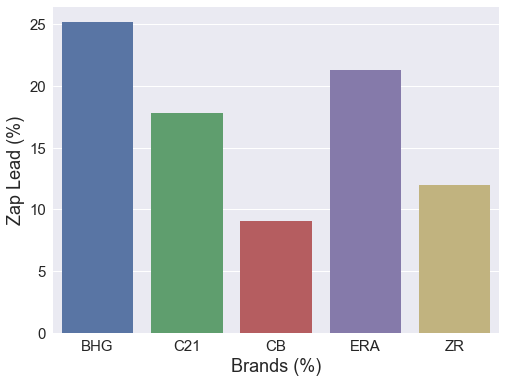

In [82]:
dd = dca.groupby("application_id")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd.index, dd)
plt.ylabel("Zap Lead (%)", fontsize=18)
plt.xlabel("Brands (%)", fontsize=18)

In [83]:
density = dca.lr_website_name.value_counts()
temp_list = density[density > 100].index

Text(0.5,1,'Number of Customer')

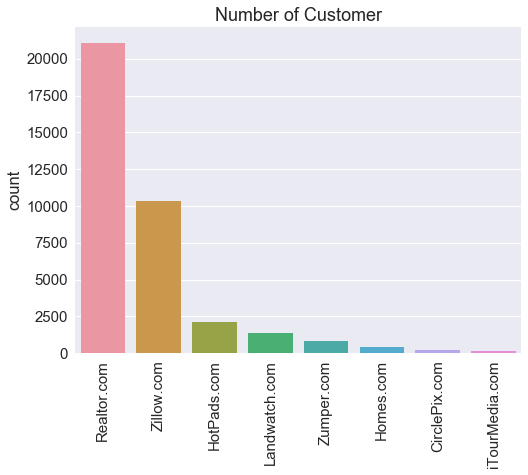

In [84]:
plt.subplots(figsize=(8,6))
sns.countplot(dca.loc[dca["lr_website_name"].isin(temp_list), "lr_website_name"], order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.title("Number of Customer")

Text(0.5,1,'Number of Lead')

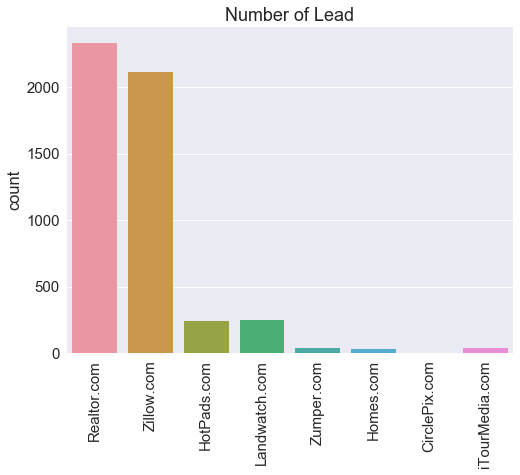

In [85]:
plt.subplots(figsize=(8,6))
index = (dca["lr_website_name"].isin(temp_list)) & (dca.status_id == 1)
sns.countplot(dca.loc[index, "lr_website_name"], order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.title("Number of Lead")

Text(0,0.5,'Zap Lead (%)')

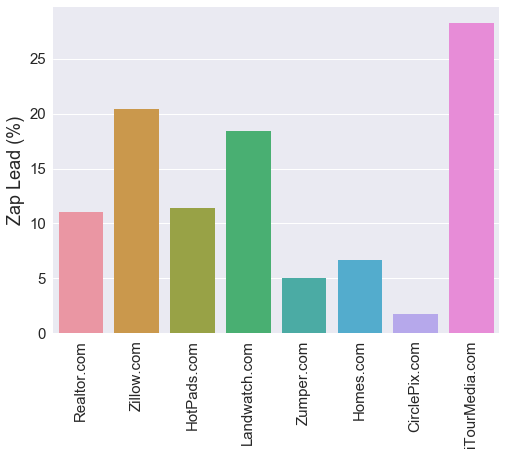

In [86]:
dd = dca[dca["lr_website_name"].isin(temp_list)].groupby("lr_website_name")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd.index, dd, order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.ylabel("Zap Lead (%)", fontsize=18)

In [90]:
density = dca.metro.value_counts()
temp_list = density[density > 200].index

Text(0.5,1,'Number of Customer')

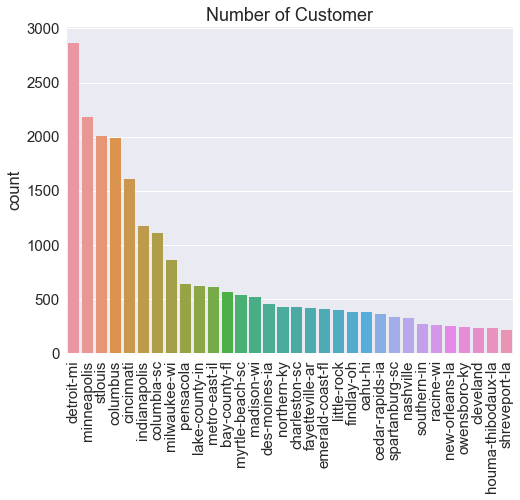

In [91]:
plt.subplots(figsize=(8,6))
sns.countplot(dca.loc[dca["metro"].isin(temp_list), "metro"], order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.title("Number of Customer")

Text(0,0.5,'Zap Lead (%)')

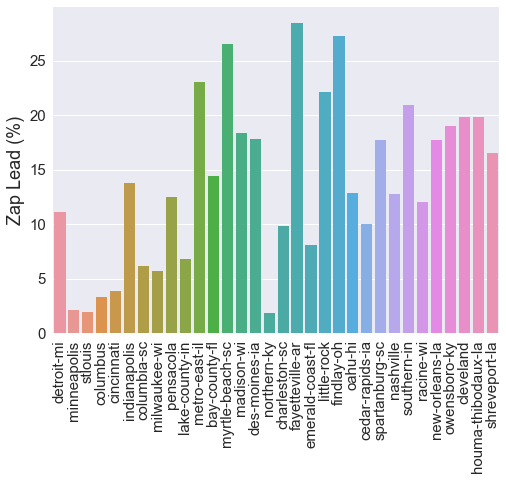

In [92]:
dd = dca[dca["metro"].isin(temp_list)].groupby("metro")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd.index, dd, order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.ylabel("Zap Lead (%)", fontsize=18)

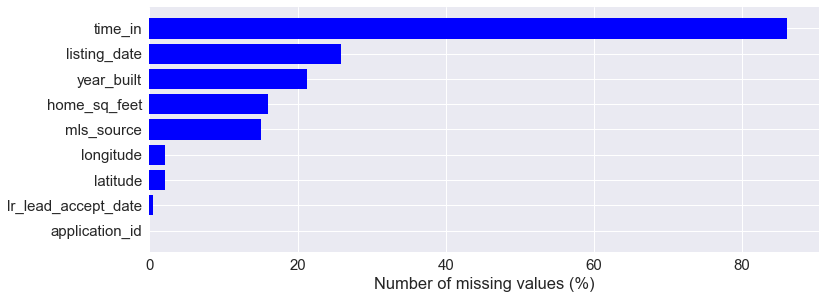

In [93]:
pl.missing(dca)

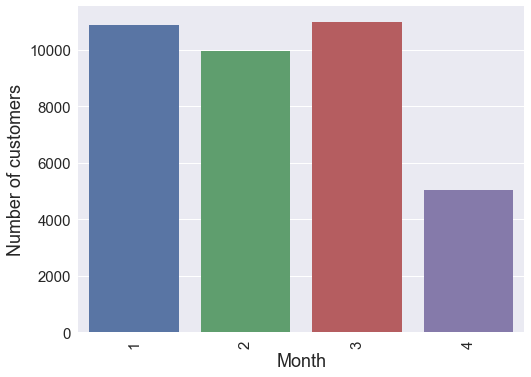

In [94]:
pl.count_bar(dca.lr_month, xlabel="Month", ylabel="Number of customers")

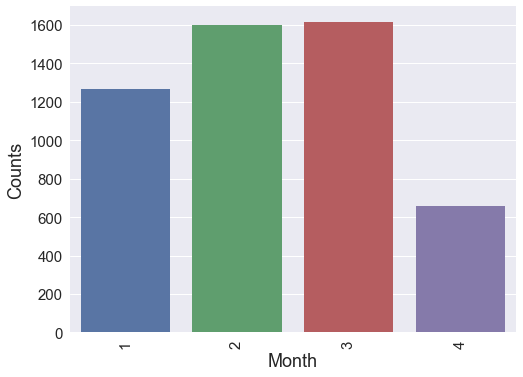

In [95]:
pl.count_bar(dca[dca.status_id == 1].lr_month, xlabel="Month")

Text(0.5,0,'Month')

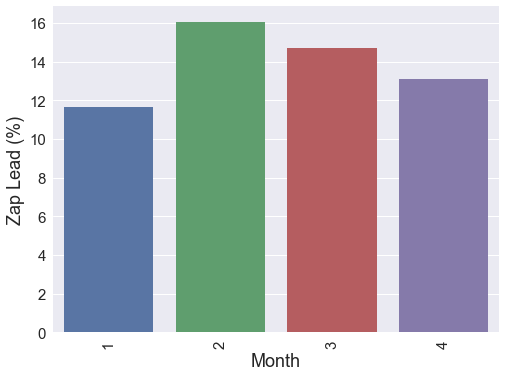

In [96]:
dd = dca.groupby("lr_month")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd.index, dd)
plt.xticks(rotation='vertical')
plt.ylabel("Zap Lead (%)", fontsize=18)
plt.xlabel("Month", fontsize=18)

In [122]:
density = dca.lr_website_name.value_counts()
temp_list = density[density > 100].index

out = pd.DataFrame()
for i in range(3):
    dd = dca[dca.lr_website_name == temp_list[i]].groupby("lr_month")["status_id"].mean() * 100
    out[temp_list[i]] = dd
    
out = out.reset_index()

Text(0,0.5,'Zap Lead (%)')

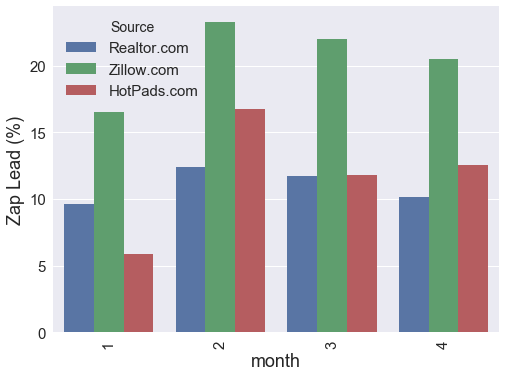

In [124]:
dd = pd.melt(out, id_vars="lr_month", var_name="Source", value_name="transition_rate")

plt.subplots(figsize=(8,6))
sns.barplot(x="lr_month", y="transition_rate", hue="Source", data=dd)
plt.xticks(rotation='vertical')
plt.xlabel("month", fontsize=18)
plt.ylabel("Zap Lead (%)", fontsize=18)

In [99]:
dca["time_diff"] = (pd.DatetimeIndex(dca["time_in"]) - pd.DatetimeIndex(dca["lr_lead_create_date"])).astype('timedelta64[h]')

In [100]:
dd = dca[(~dca["time_diff"].isnull()) & (dca["time_diff"] >= 0.0)]

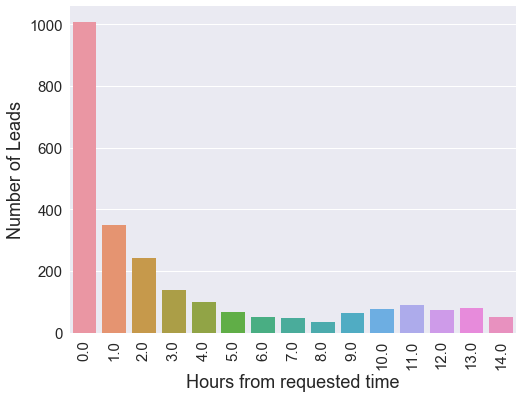

In [101]:
pl.count_bar(dd.loc[(dd["time_diff"] < 15), "time_diff"], xlabel="Hours from requested time", ylabel="Number of Leads")

In [102]:
dca.columns

Index(['customer_id', 'customer_date', 'client_date', 'client_id',
       'lr_website_name', 'metro', 'lr_lead_accept_date',
       'lr_lead_create_date', 'application_id', 'lr_month', 'time_in',
       'listing_num', 'postal_code', 'mls_source', 'mls_table',
       'listing_price', 'property_type', 'bedrooms', 'city', 'full_baths',
       'home_sq_feet', 'listing_date', 'state', 'year_built', 'latitude',
       'longitude', 'status', 'status_id', 'time_diff'],
      dtype='object')

(0, 1200000.0)

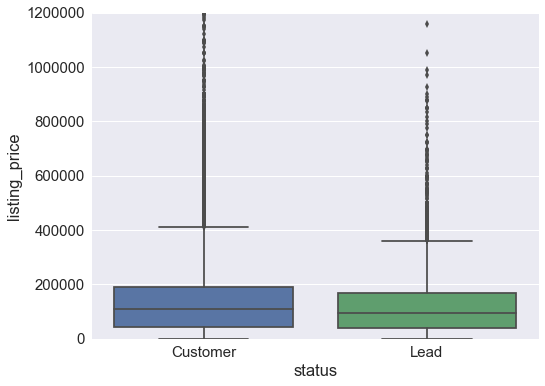

In [103]:
plt.subplots(figsize=(8,6))
sns.boxplot(x=dca.status, y=(dca.listing_price))
plt.ylim(0,1.2e6)

(0, 5e-06)

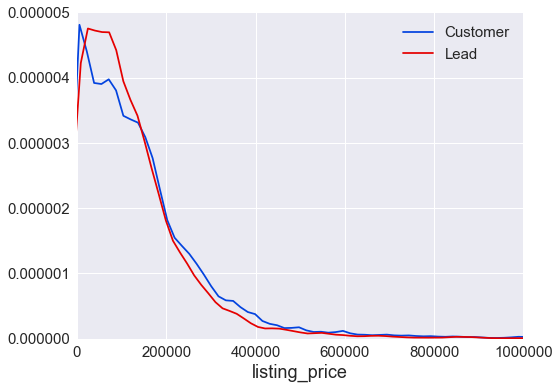

In [104]:
dd = dca[dca.listing_price < 2e6]
plt.subplots(figsize=(8,6))
index = (dd.status_id == 0)
x = (dd.loc[index, "listing_price"])
sns.distplot(x, kde=True, bins=100, color=sns.xkcd_rgb["blue"], hist=False, label="Customer")
index = (dd.status_id == 1)
x = (dd.loc[index, "listing_price"])
sns.distplot(x, kde=True, bins=100, color=sns.xkcd_rgb["red"], hist=False, label="Lead")

plt.xlabel("listing_price", fontsize=18)
plt.xlim(0,1e6)
plt.ylim(0,5e-6)

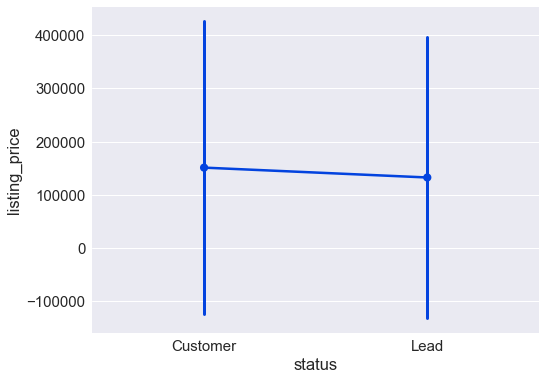

In [105]:
plt.figure(figsize=(8,6))
sns.pointplot(x=dca.status, y=dca.listing_price, errwidth=3.0, scale=.8, ci="sd", color=sns.xkcd_rgb["blue"])
# plt.xticks(rotation='vertical')
#         plt.xlabel(xlabel, fontsize=18)
#         plt.ylabel(ylabel, fontsize=18)
#         sns.despine()
#         plt.show()

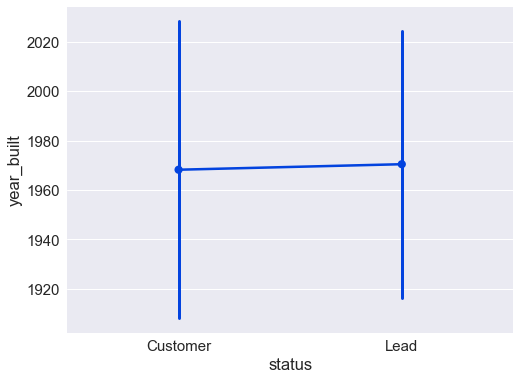

In [106]:
plt.figure(figsize=(8,6))
sns.pointplot(x=dca.status, y=dca.year_built, errwidth=3.0, scale=.8, ci="sd", color=sns.xkcd_rgb["blue"])

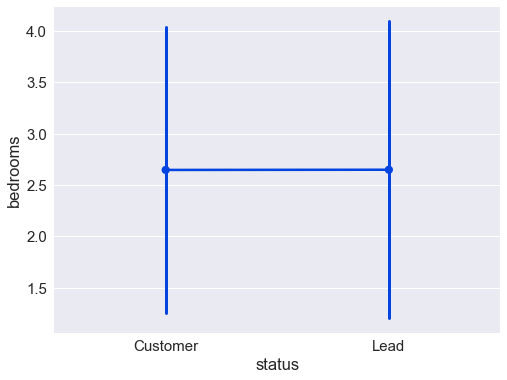

In [107]:
plt.figure(figsize=(8,6))
sns.pointplot(x=dca.status, y=dca.bedrooms, errwidth=3.0, scale=.8, ci="sd", color=sns.xkcd_rgb["blue"])

In [108]:
dca["time_listing_diff"] = (pd.DatetimeIndex(dca["customer_date"]) - pd.DatetimeIndex(dca["listing_date"])).astype('timedelta64[D]')

In [109]:
dd = dca[(~dca["time_listing_diff"].isnull()) & (dca["time_listing_diff"] >= 0.0)]

In [110]:
dd.shape

(22378, 30)

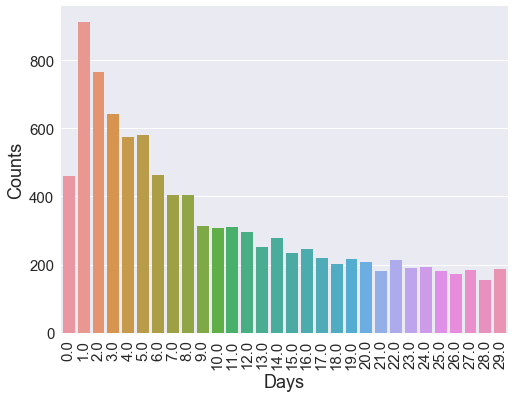

In [111]:
pl.count_bar(dd.loc[(dd["time_listing_diff"] < 30), "time_listing_diff"], xlabel="Days")

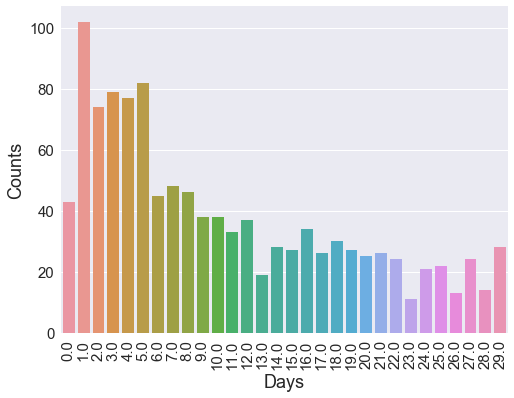

In [112]:
pl.count_bar(dd.loc[(dd["time_listing_diff"] < 30) & (dd.status_id == 1) , "time_listing_diff"], xlabel="Days")

Text(0.5,0,'Day')

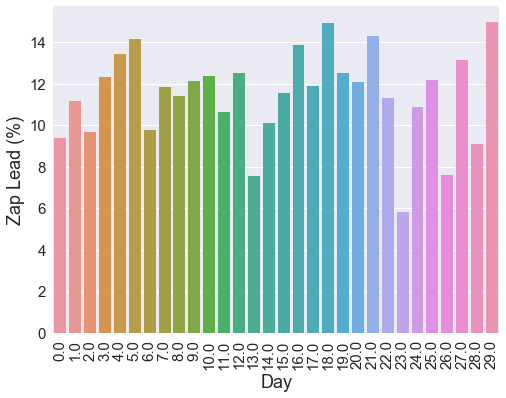

In [113]:
dd1 = dd[(dd["time_listing_diff"] < 30)].groupby("time_listing_diff")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd1.index, dd1)
plt.xticks(rotation='vertical')
plt.ylabel("Zap Lead (%)", fontsize=18)
plt.xlabel("Day", fontsize=18)

In [114]:
density = dca.property_type.value_counts()
temp_list = density[density > 100].index

Text(0.5,1,'Number of Customer')

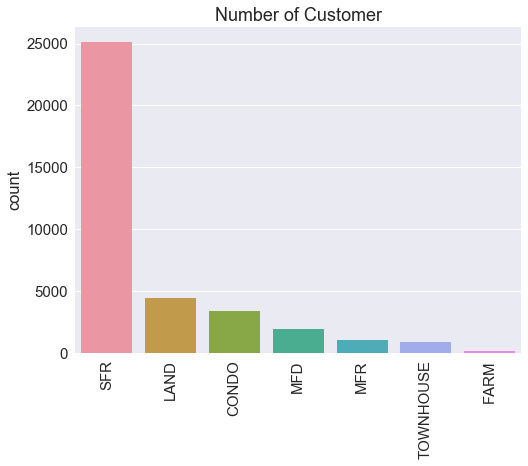

In [115]:
plt.subplots(figsize=(8,6))
sns.countplot(dca.loc[dca["property_type"].isin(temp_list), "property_type"], order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.title("Number of Customer")

Text(0,0.5,'Zap Lead (%)')

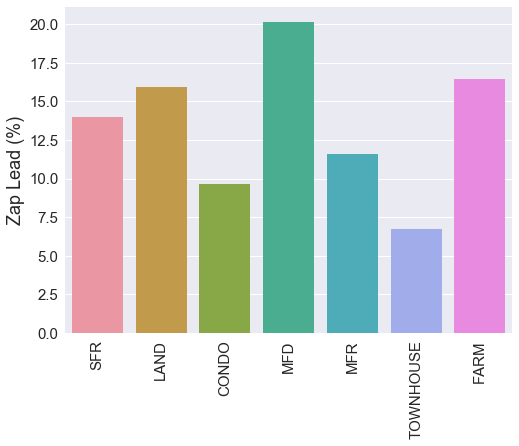

In [116]:
dd = dca[dca["property_type"].isin(temp_list)].groupby("property_type")["status_id"].mean() * 100

plt.subplots(figsize=(8,6))
sns.barplot(dd.index, dd, order = temp_list)
plt.xticks(rotation='vertical')
plt.xlabel("", fontsize=18)
plt.ylabel("Zap Lead (%)", fontsize=18)

In [90]:
dca.to_csv("lead_ca_2018.csv", index = False)